In [1]:
import pandas as pd
import sys

sys.path.append('../land-eligibility/src/')
from utils import read_config
sys.path.append('../src/construct/')
import util

config = read_config('../config/default.yaml')

idx = pd.IndexSlice


END_USE_CARRIER_NAMES = {  # we keep these carriers, since we don't want fossils subcategories but we do want renewables subcategories
    'E7000': 'electricity',
    'G3000': 'natural_gas',
    'H8000': 'heat',
    'O4000': 'oil',
    'R5110-5150_W6000RI': 'biomass',
    'R5300': 'biogas',
    'RA410': 'solar_thermal',
    'RA600': 'ambient_heat',
    'SFF_P1000_S2000': 'coal',
    'C0000X0350-0370': 'coal',
    'P1000': 'coal',
    'S2000': 'coal',
    'O4000XBIO': 'oil',
    'W6100_6220': 'biomass',
}
energy_balance = '../build/annual_energy_balances.csv'
countries = config["scope"]["countries"]

In [2]:
country_codes = {
    util.get_alpha2(i, eurostat=True): util.get_alpha3(i) for i in countries
}
energy_balance_df = pd.read_csv(
    energy_balance, index_col=[0, 1, 2, 3, 4], header=0, squeeze=True
)

energy_balance_df = (
    energy_balance_df.xs(('FC_IND_E', 'TJ'), level=('cat_code', 'unit'))
    .unstack('year')
    .groupby([END_USE_CARRIER_NAMES, country_codes], level=['carrier_code', 'country'])
    .sum()
    .rename_axis(['carrier_name', 'country_code'], axis=0)
)

/cluster/work/apatt/brynmorp/miniconda/envs/euro-spores/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
energy_balance_df

year                        1980  1981  1982  1983  1984  1985  1986  1987  \
carrier_name  country_code                                                   
ambient_heat  ALB            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              AUT            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              BEL            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              BGR            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              BIH            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                          ...   ...   ...   ...   ...   ...   ...   ...   
solar_thermal ROU            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              SRB            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              SVK            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              SVN            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              SWE            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

year                        1988  1989  ...    2009    2010     2011     2012  \
carrier_name  country_code              ...                                     
ambient_heat  ALB            0.0   0.0  ...   0.000   0.000    0.000    0.000   
              AUT            0.0   0.0  ...  89.791  89.989  132.505  149.083   
              BEL            0.0   0.0  ...   0.000  62.000   67.000   93.000   
              BGR            0.0   0.0  ...   0.000   0.000    0.000    0.000   
              BIH            0.0   0.0  ...   0.000   0.000    0.000    0.000   
...                          ...   ...  ...     ...     ...      ...      ...   
solar_thermal ROU            0.0   0.0  ...   1.000   1.000    0.000    0.000   
              SRB            0.0   0.0  ...   0.000   0.000    0.000    0.000   
              SVK            0.0   0.0  ...   0.000   0.000    0.000    0.000   
              SVN            0.0   0.0  ...   0.000   0.000    0.000    0.000   
              SWE            0.0   0.0  ...   0.000   0.000    0.000    0.000   

year                           2013     2014    2015     2016     2017  \
carrier_name  country_code                                               
ambient_heat  ALB             0.000    0.000    0.00    0.000    0.000   
              AUT           162.874  226.216  163.21  196.927  244.824   
              BEL           124.000  118.100  132.60  144.700  136.900   
              BGR             0.000    0.000    0.00    0.000    0.000   
              BIH             0.000    0.000    0.00    0.000    0.000   
...                             ...      ...     ...      ...      ...   
solar_thermal ROU             7.000   21.000   20.00   21.000   28.245   
              SRB             0.000    0.000    0.00    0.000    0.000   
              SVK             0.000    0.000    0.00    0.000    0.000   
              SVN             0.000    0.000    0.00    0.000    0.000   
              SWE             0.000    0.000    0.00    0.000    0.000   

year                           2018  
carrier_name  country_code           
ambient_heat  ALB             0.000  
              AUT           311.999  
              BEL           135.400  
              BGR             0.000  
              BIH             0.000  
...                             ...  
solar_thermal ROU            28.187  
              SRB             0.000  
              SVK             0.000  
              SVN             0.000  
              SWE             0.000  

[312 rows x 39 columns]

In [8]:
energy_balance_df[2018].unstack().apply(util.tj_to_twh)

country_code,ALB,AUT,BEL,BGR,BIH,CHE,CYP,CZE,DEU,DNK,...,MNE,NLD,NOR,POL,PRT,ROU,SRB,SVK,SVN,SWE
carrier_name,,,,,,,,,,,,,,,,,,,,,
ambient_heat,0.000000,0.086666,0.037611,0.000000,0.000000,NaN,0.000000,0.174575,0.123333,0.593886,...,0.000000,0.000000,0.459444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
biogas,0.000000,0.290513,0.425306,0.042598,0.000000,NaN,0.018384,0.071016,0.761944,0.101480,...,0.000000,0.369861,0.071972,0.150433,0.090484,0.034265,0.016601,0.001111,0.004510,0.110833
biomass,0.088388,16.868617,9.470667,2.829985,0.200278,6.061111,0.312554,7.851872,38.997222,2.320359,...,0.096667,1.076103,3.516431,28.447371,12.874556,4.728763,1.992948,6.510278,1.443516,48.162778
coal,2.559819,3.590559,5.124700,2.663964,1.774652,1.163889,0.158329,9.786855,37.740188,1.453166,...,0.031727,1.113631,5.380893,35.296590,0.118046,6.778202,3.174036,3.622092,0.475173,4.348483
electricity,1.316056,28.670085,38.898200,9.871654,4.367000,17.311111,0.530035,24.201927,230.527000,8.573454,...,0.737400,36.058444,47.004318,56.424095,16.396898,22.224841,8.735280,12.794000,6.847196,50.719000
heat,0.000000,3.067289,3.914278,0.858365,0.006111,1.919444,0.000000,6.570487,53.184444,0.904434,...,0.000000,16.394824,0.550333,9.624324,2.375442,3.353271,2.471931,0.731667,0.582440,6.060000
natural_gas,0.092491,32.107263,46.913188,10.406697,1.012503,10.897222,0.000000,23.535981,228.012980,8.323611,...,0.000000,59.472327,3.204284,45.467179,14.504115,26.534496,7.154529,10.321792,5.412363,3.928018
oil,1.075570,3.889360,17.182106,4.661042,1.400135,3.958333,1.302733,1.829627,42.603489,4.738481,...,0.710720,38.101993,9.761528,8.735864,6.766930,11.502342,4.104826,3.483030,1.364582,11.680046
solar_thermal,0.011398,0.000000,0.000306,0.000000,0.000000,NaN,0.004667,0.000000,0.002500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.007830,0.000000,0.000000,0.000000,0.000000


In [6]:
euro_calliope_demand = pd.read_csv('../land-eligibility/build/national/demand.csv', index_col=0)
euro_calliope_industry = euro_calliope_demand['demand_twh_per_year'] * euro_calliope_demand['industrial_demand_fraction']

Text(0.5, 0, 'Euro-calliope heavy industry electricity annual consumption (TWh)')

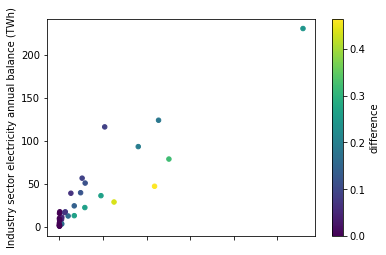

In [16]:
compare_consumption = pd.concat([euro_calliope_industry, energy_balance_df[2018].unstack().apply(util.tj_to_twh).loc['electricity']], axis=1, sort=True, keys=['euro_calliope_demand', 'energy_balance_demand'])
compare_consumption['difference'] = compare_consumption['euro_calliope_demand'] / compare_consumption['energy_balance_demand']
ax = compare_consumption.plot.scatter(x='euro_calliope_demand', y='energy_balance_demand', c='difference', cmap='viridis')
ax.set_ylabel('Industry sector electricity annual balance (TWh)')
ax.set_xlabel('Euro-calliope heavy industry electricity annual consumption (TWh)')